<a href="https://colab.research.google.com/github/pbarstad/Vehicle-Machine-Learning/blob/master/Barstad_Egan_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Vehicle MSRP with Different Activation Functions

>  **Paul Barstad and Brett Egan**



For this project we plan to use a dataset from Kaggle: https://www.kaggle.com/CooperUnion/cardataset/discussion. Cars have always been of interest to us, being able combine a passion with Machine Learning for this project will be great. This dataset has 17 properties of vehicles produced since 1990, including Make, Model, Engine, Horsepower and more. We want to predict the MSRP of vehicles given the other 16 attributes. To train this data we plan to use the tanh, relu, and SGD algorithms we discussed in class. 

Here is an example of an entry from the Kaggle dataset:

In [0]:
import pandas as pd

carData = pd.read_csv('cardata.csv')
carData.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


Below we have partitioned our dataset for X to contain the following input variables:

    Make, Model, Year, Engine Fuel Type, Engine Cylinders, Transmission Type, Driven_wheels, Number of Doors, Market Category, Vehicle Size, Vehicle Style, Highway MPG, City MPG, Popularity.
    
Allowing T to contain our dependent variable:

    MSRP.

#Data Manipulation and Partitioning

In [0]:
carData = carData.dropna(how='any',axis=0) #remove any row entries with N/A from the dataset
    
carData.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

Above is the list of types in our dataset. All of the columns of type *object*, prevent us from training a neural network with the tanh and relu activation function. To remedy this, we need to turn the categorical data into numeric data. The technique we used to do this was found here: https://pbpython.com/categorical-encoding.html.

In [0]:
carData["Make"] = carData["Make"].astype('category')
carData["Make"] = carData["Make"].cat.codes
carData["Model"] = carData["Model"].astype('category')
carData["Model"] = carData["Model"].cat.codes
carData["Engine Fuel Type"] = carData["Engine Fuel Type"].astype('category')
carData["Engine Fuel Type"] = carData["Engine Fuel Type"].cat.codes
carData["Transmission Type"] = carData["Transmission Type"].astype('category')
carData["Transmission Type"] = carData["Transmission Type"].cat.codes
carData["Driven_Wheels"] = carData["Driven_Wheels"].astype('category')
carData["Driven_Wheels"] = carData["Driven_Wheels"].cat.codes
carData["Market Category"] = carData["Market Category"].astype('category')
carData["Market Category"] = carData["Market Category"].cat.codes
carData["Vehicle Size"] = carData["Vehicle Size"].astype('category')
carData["Vehicle Size"] = carData["Vehicle Size"].cat.codes
carData["Vehicle Style"] = carData["Vehicle Style"].astype('category')
carData["Vehicle Style"] = carData["Vehicle Style"].cat.codes

carData.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,1,2011,6,335.0,6.0,3,3,2.0,37,0,8,26,19,3916,46135
1,4,0,2011,6,300.0,6.0,3,3,2.0,66,0,6,28,19,3916,40650
2,4,0,2011,6,300.0,6.0,3,3,2.0,63,0,8,28,20,3916,36350
3,4,0,2011,6,230.0,6.0,3,3,2.0,66,0,8,28,18,3916,29450
4,4,0,2011,6,230.0,6.0,3,3,2.0,62,0,6,28,18,3916,34500


In [0]:
import numpy as np

data = carData.values
print("Read",data.shape[0],"rows and",data.shape[1],"columns from cardata.csv")
#data = data.values
#print("After removing rows containing N/A, data has", data.shape[0] ,"rows and", data.shape[1], "columns.")
X = data[:,0:15] #get everything but MSRP
print("Independent variables: ", X[0:2])
T = data[:,15] #get the MSRP
print("MSRP: ", T[0:2])
Xnames =  ['Make', 'Model','Year','Engine Fuel Type','Engine Cylinders','Transmission Type','Driven_wheels','Number of Doors','Market Category','Vehicle Size','Vehicle Style','Highway MPG','City MPG','Popularity']
Tname = ['MSRP']

Read 8084 rows and 16 columns from cardata.csv
Independent variables:  [[4.000e+00 1.000e+00 2.011e+03 6.000e+00 3.350e+02 6.000e+00 3.000e+00
  3.000e+00 2.000e+00 3.700e+01 0.000e+00 8.000e+00 2.600e+01 1.900e+01
  3.916e+03]
 [4.000e+00 0.000e+00 2.011e+03 6.000e+00 3.000e+02 6.000e+00 3.000e+00
  3.000e+00 2.000e+00 6.600e+01 0.000e+00 6.000e+00 2.800e+01 1.900e+01
  3.916e+03]]
MSRP:  [46135. 40650.]


Above we show two entries of the now uncomprehendable input data, and the two MSRP values with respect to those inputs, from the dataset.

In [0]:
#partition carData 80/20 for training/testing
nRows = X.shape[0]
rows = np.arange(nRows)
np.random.shuffle(rows)
nTrain = int(nRows * 0.8)
trainRows = rows[:nTrain] # 80% of carData for training
testRows = rows[nTrain:]  # remaining 20% of carData for testing
Xtrain, Ttrain = X[trainRows], T[trainRows]
Xtest, Ttest = X[testRows], T[testRows]

Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((6467, 15), (6467,), (1617, 15), (1617,))

#tanh and relu

In [0]:
import neuralnetworks as nn

def rmse(A, B):
    return np.mean(abs(A - B))

def run_parameters_act(Xtrain, Ttrain, Xtest, Ttest, activation_functions, epochs_list, nh_list, verbose=True):
    
    results = pd.DataFrame(columns=['Epochs', 'Hidden Units', 'Activation', 'RMSE Train', 'RMSE Test'])
    testResults = pd.DataFrame(columns=['Epochs', 'Hidden Units', 'Activation', 'Predicted', 'Actual'])
    n_inputs = Xtrain.shape[1]  # number of columns in X
    n_outputs = 1 
    
    #loop through activation functions because can run tanh, relu, or both
    for func in activation_functions:
        #if tanh call run_parameters
        if(func == 'tanh'):
            print('Calculating tanh')
            for n_epochs in epochs_list:        
                for nh in nh_list:
                    nnet = nn.NeuralNetwork(n_inputs, nh, n_outputs)
                    nnet.train(Xtrain, Ttrain, n_epochs)
                    Ytrain = nnet.use(Xtrain)
                    Ytest = nnet.use(Xtest)
                    results.loc[len(results)] = [n_epochs, nh, 'tanh', rmse(Ytrain, Ttrain), rmse(Ytest, Ttest)]
                    for i in range(0, Ytest.shape[0]):
                        testResults.loc[len(testResults)] = [n_epochs, nh, 'tanh', Ytest[i], Ttest[i]]
                        
                    if verbose:
                        display(results.tail(1))  # not print
                
        
        #if relu instantiate other neuralNetwork_relu class, call train on that...
        if(func == 'relu'):
            print('Calculating relu')
            for n_epochs in epochs_list:        
                for nh in nh_list:
                    nnetR = nn.NeuralNetwork_relu(n_inputs, nh, n_outputs)
                    nnetR.train(Xtrain, Ttrain, n_epochs)
                    Ytrain = nnetR.use(Xtrain)
                    Ytest = nnetR.use(Xtest)
                    results.loc[len(results)] = [n_epochs, nh, 'relu', rmse(Ytrain, Ttrain), rmse(Ytest, Ttest)]
                    for i in range(0, Ytest.shape[0]):
                        testResults.loc[len(testResults)] = [n_epochs, nh, 'relu', Ytest[i], Ttest[i]]
                    
                    if verbose:
                        display(results.tail(1))  # not print
                        
    return results, testResults

In [0]:
epochs = [10, 50, 100, 500, 1000]
hiddenUn = [1, 5, 10]
results, testResults = run_parameters_act(Xtrain, Ttrain, Xtest, Ttest, ['tanh', 'relu'], epochs, hiddenUn, verbose=False)
results.sort_values('RMSE Test').head(10)

Calculating tanh
Calculating relu
2.2487889737993098e-17


,Epochs,Hidden Units,Activation,RMSE Train,RMSE Test
14,1000,10,tanh,13469.860614,33827.818290
13,1000,5,tanh,16624.058245,34402.460430
10,500,5,tanh,20572.027395,36540.811864
19,50,5,relu,24714.566890,38240.953083
7,100,5,tanh,27087.319275,39415.996151
11,500,10,tanh,14734.833944,39631.298166
28,1000,5,relu,24695.140522,40224.226989
22,100,5,relu,23447.403788,40419.607429
29,1000,10,relu,14531.106914,41095.533711
20,50,10,relu,32623.600820,41254.337255


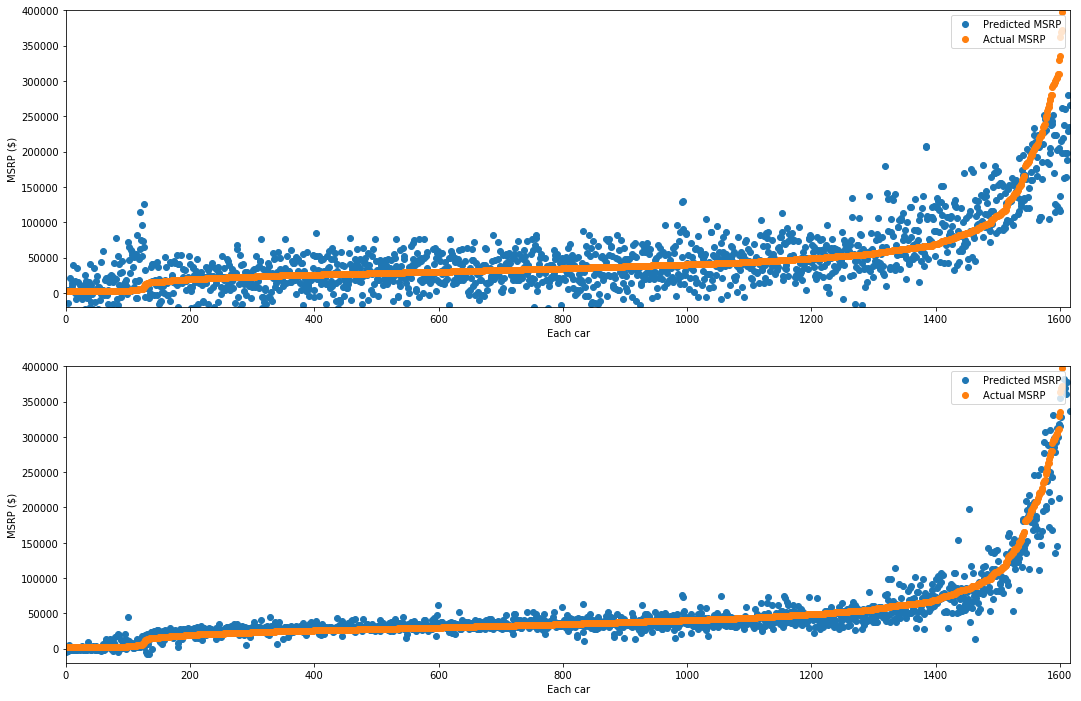

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

#print(testResults.head(10))
testT = testResults.loc[(testResults['Epochs'] == 10) & (testResults['Hidden Units'] == 10) & (testResults['Activation'] == 'tanh')]
#print(test.shape)
testT = testT.sort_values('Actual')

plt.figure(figsize=(18, 12))
plt.subplot(2, 1, 1)
plt.plot(range(testT.shape[0]), testT['Predicted'], 'o', range(testT.shape[0]), testT['Actual'], 'o')
plt.xlim(0, testT.shape[0])
plt.ylim(-20000, 400000)
plt.legend(('Predicted MSRP', 'Actual MSRP'), loc='upper right')
plt.xlabel('Each car')
plt.ylabel('MSRP ($)')

testT1 = testResults.loc[(testResults['Epochs'] == 1000) & (testResults['Hidden Units'] == 10) & (testResults['Activation'] == 'tanh')]
testT1 = testT1.sort_values('Actual')

plt.subplot(2, 1, 2)
plt.plot(range(testT1.shape[0]), testT1['Predicted'], 'o', range(testT1.shape[0]), testT1['Actual'], 'o')
plt.xlim(0, testT1.shape[0])
plt.ylim(-20000, 400000)
plt.legend(('Predicted MSRP', 'Actual MSRP'), loc='upper right')
plt.xlabel('Each car')
plt.ylabel('MSRP ($)')

plt.show()

The RMSE values created in run_parameters_act() will be helpful in determining the best parameters. However when graphing the pricted MSRP values of the test data, we noticed the lowest RMSE graphs were less than desirable. As so much of the cars in the dataset cost between 20,000 and 60,000 dollars, the neural network doesn't have to try very hard to train and display low RMSE values.

The first plot shows the configuration for the tanh activation function (10 epochs, and 10 hidden units). By increasing the epochs to 1000 in the second plot above we can see that the network trains much better to our eye, and created a lower RMSE value. Most of the iterations of us running this code had a smaller RMSE for the low epochs, not what we expect. This final iteration actually created the lowest RMSE with highest epochs. Next we will take a look at the results from the relu specified neural networks. 

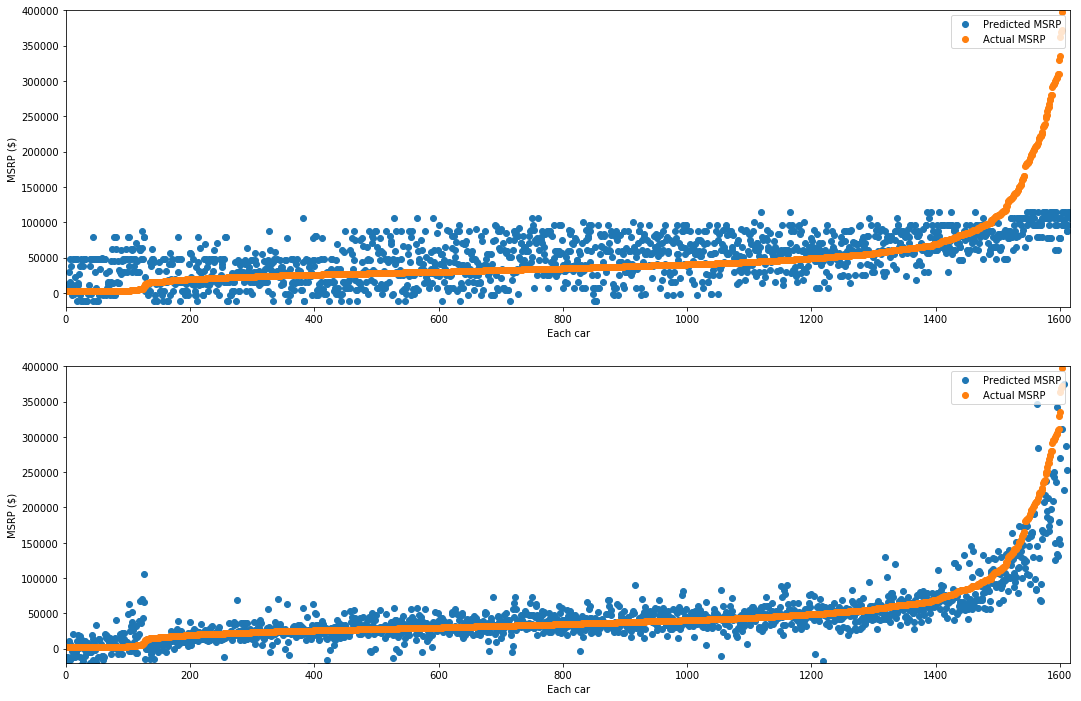

In [0]:
testR = testResults.loc[(testResults['Epochs'] == 500) & (testResults['Hidden Units'] == 5) & (testResults['Activation'] == 'relu')]
#print(testR.shape)
testR = test.sort_values('Actual');

plt.figure(figsize=(18, 12))
plt.subplot(2, 1, 1)
plt.plot(range(testR.shape[0]), testR['Predicted'], 'o', range(testR.shape[0]), testR['Actual'], 'o')
plt.xlim(0, testR.shape[0])
plt.ylim(-20000, 400000)
plt.legend(('Predicted MSRP', 'Actual MSRP'), loc='upper right')
plt.xlabel('Each car')
plt.ylabel('MSRP ($)')

testR1 = testResults.loc[(testResults['Epochs'] == 1000) & (testResults['Hidden Units'] == 5) & (testResults['Activation'] == 'relu')]
testR1 = testR1.sort_values('Actual')

plt.subplot(2, 1, 2)
plt.plot(range(testR1.shape[0]), testR1['Predicted'], 'o', range(testR1.shape[0]), testR1['Actual'], 'o')
plt.xlim(0, testR1.shape[0])
plt.ylim(-20000, 400000)
plt.legend(('Predicted MSRP', 'Actual MSRP'), loc='upper right')
plt.xlabel('Each car')
plt.ylabel('MSRP ($)')

plt.show()

The relu plots show a similar issue to the first set of tanh plots. The predicted values in the first plot (500 epochs, 5 hidden units) do not stray much from about 0 to 100,000 dollars. There were some negative predictions, as well as none above 100,000 is not very useful for the real world application.

Again, we saw a much better representation graphically of predicted MSRP once we increased the epochs to 1000. The predicted values became much more concise, centered around the actual MSRP values. We ran run_parameters many times, and saw that 5 hidden units on average produced the lowest RMSE regardless of what activation function was used. We believe if we had a different dataset, or reduced the number of cars with an MSRP between 20,000 and 60,000 then we would consistently see that the more epochs, the better our neural network would train.

#SGD

In [0]:
import IPython.display as ipd  # for display and clear_output
import time  # for sleep
import numpy as np

In [0]:
from sklearn.model_selection import train_test_split
X = data[:,0:15] #get everything but MSRP
#print("Independent variables: ", X[0:2])
T = data[:,15] #get the MSRP
X = np.array(X)
T = np.array(T)
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.20) # split up random test 

In [0]:
# Standardize the input Xtrain and Xtest
XtrainMean = np.mean(Xtrain, axis=0) # get means of columns 
XtrainStd = np.std(Xtrain, axis=0) # get std devs of columns
Xtrain = (Xtrain - XtrainMean) / XtrainStd #standardize

XtestMean = np.mean(Xtest, axis=0) # get means of columns 
Xtest = (Xtest - XtestMean) / XtrainStd #standardize

Ttrain = np.reshape(Ttrain, (-1,1))
Ttest = np.reshape(Ttest, (-1,1))

In [0]:
def make_weights(shapes):
    '''make_weights(shape): weights is list of pairs of (n_inputs, n_units) for each layer.
    n_inputs includes the constant 1 input.
    Returns weight vector w of all weights, and list of matrix views into w for each layer'''
    # Make list of number of weights in each layer
    n_weights_each_matrix = [sh[0] * sh[1] for sh in shapes]
    # Total number of weights
    n_weights = sum(n_weights_each_matrix)
    # Allocate weight vector with component for each weight
    w = np.zeros(n_weights)
    # List Ws will be list of weight matrix views into w for each layer
    w_views = make_views_on_weights(w, shapes)
    return w, w_views    

In [0]:
def make_views_on_weights(w, shapes):    
    w_views = []
    first = 0
    for sh in shapes:
        # Create new view of w[first:last]
        last = first + sh[0] * sh[1]
        # Create new view of w[first:last] as matrix W to be matrix for a layer
        W = w[first:last].reshape(sh)
        # Initialize weight values to small uniformly-distributed values
        n_inputs = sh[0]
        scale = 1.0 / np.sqrt(n_inputs)
        W[:] = np.random.uniform(-scale, scale, size=sh)
        # Add to list of W matrices, Ws.
        w_views.append(W)
        first = last
    return w_views

In [0]:
def forward(w_views, X1):
    # Forward pass on training data
    V, W = w_views
    Z = np.tanh(X1 @ V)
    Z1 = np.insert(Z, 0, 1, 1)
    Y = Z1 @ W
    return Z1, Y
  
def backward(w_views, X1, Z1, T, error):
    V, W = w_views
    # Backward pass. 
    # Calculate the gradient of squared error with respect to all weights in w.
    #   Order of in w is all hidden layer weights followed by all output layer weights,
    #   so gradient values are ordered this way.
    gradient =  np.hstack(((- X1.T @ ( ( error @ W[1:, :].T) * (1 - Z1[:, 1:]**2))).flat,  # for hidden layer
                          (- Z1.T @ error).flat))  # for output layer
    return gradient

In [0]:
def sgd_init():
    pass

def sgd(w, w_views, X1, T, learning_rate):
    Z1, Y = forward(w_views, X1)

    # Error in output
    n_samples = X1.shape[0]
    n_outputs = T.shape[1]
    
    error = (T - Y) / (n_samples + n_outputs)

    gradient = backward(w_views, X1, Z1, T, error)
   
    # update values of w, in place. Don't need to return it.
    
    w -= learning_rate * gradient

In [0]:
def train(Xtrain, Ttrain, Xtest, Ttest,
          n_hiddens, 
          gradient_descent_method_init, gradient_descent_method, 
          batch_size, n_epochs, learning_rate, graphics_rate=0):

    # Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
    n_inputs = Xtrain.shape[1]
    n_outputs = Ttrain.shape[1]
    Vshape = (1 + n_inputs, n_hiddens)
    Wshape = (1 + n_hiddens, n_outputs)
    w, [V, W] = make_weights([Vshape, Wshape])

    error_trace = np.zeros((n_epochs, 2))

    Xtrain1 = np.insert(Xtrain, 0, 1, 1)
    Xtest1 = np.insert(Xtest, 0, 1, 1)
    n_samples = Xtrain1.shape[0]
        
    gradient_descent_method_init()
    
    for epoch in range(n_epochs):

        # gradient_descent_method_init()
        
        # Reorder samples
        rows = np.arange(n_samples)
        np.random.shuffle(rows)
        
        for first_n in range(0, n_samples, batch_size):
            last_n = first_n + batch_size
            rows_batch = rows[first_n:last_n]
            Xtrain1_batch = Xtrain1[rows_batch, :]
            Ttrain_batch = Ttrain[rows_batch, :]
            # gradient_descent method changes values of w
            gradient_descent_method(w, [V, W], Xtrain1_batch, Ttrain_batch, learning_rate)
    
        # error traces for plotting
        Z1train, Ytrain = forward([V, W], Xtrain1)
        error_trace[epoch, 0] = np.sqrt(np.mean(((Ttrain - Ytrain)**2)))
    
        Z1test, Ytest = forward([V, W], Xtest1)
        error_trace[epoch, 1] = np.sqrt(np.mean((Ytest - Ttest)**2))

    

    return Ytrain, Ytest, error_trace
 

In [0]:
def rmse(predict, T): 
    return np.sqrt(((predict - T) ** 2).mean())

def run_parameters(Xtrain, Ttrain, Xtest, Ttest, epochs, learning_rates,
                                    hidden_units, batch_sizes, verbose):
    
    results = pd.DataFrame(columns=['Algorithm', 'Epochs', 'Learning Rate', 'Hidden Units', 
                                    'Batch Size', 'RMSE Train', 'RMSE Test']) # label the columns
    testResults = pd.DataFrame(columns=['Algorithm', 'Epochs', 'Learning Rate', 'Hidden Units', 
                                    'Batch Size', 'Predicted', 'Actual'])
    
    # make 4 nested for loops to run
    # create a new entry in the results array for every unique posibility. see next line.
    # 3(epochs)*3(learning_rates)*3(hidden units)*3(batch sizes)*2(sgd or adam) = 162 rows.
    
    #sgd
    for n_epochs in epochs:
      print("running epoch: {}".format(n_epochs))
      for lr in learning_rates:
            
        for hu in hidden_units:
                
          for bs in batch_sizes:
            Ytrain, Ytest, error_trace = train(Xtrain, Ttrain, Xtest, Ttest, n_hiddens=hu, 
                           gradient_descent_method_init=sgd_init, gradient_descent_method=sgd,
                           batch_size=bs, n_epochs=n_epochs, learning_rate=lr, graphics_rate=10000)
            results.loc[len(results)] = ['sgd', n_epochs, lr, hu, bs, rmse(Ytrain, Ttrain), rmse(Ytest, Ttest)]
            for i in range(0, Ytest.shape[0]):
                testResults.loc[len(testResults)] = ['sgd', n_epochs, lr, hu, bs, Ytest[i], Ttest[i]]                                                                                

    return results, testResults
   

In [0]:
print(Ttrain.shape)


(6467, 1)


In [0]:
carResults, testResults = run_parameters(Xtrain, Ttrain, Xtest, Ttest, [50, 100, 500], [0.01, 0.05], [5, 10], [1, 25], verbose=False)

running epoch: 50
running epoch: 100
running epoch: 500


In [0]:
carResults = carResults.sort_values('RMSE Test')
carResults.head(10)

,Algorithm,Epochs,Learning Rate,Hidden Units,Batch Size,RMSE Train,RMSE Test
15,sgd,100,0.05,10,25,59474.195243,66396.936937
11,sgd,100,0.01,10,25,60436.295733,67536.165741
23,sgd,500,0.05,10,25,62141.814462,68751.120948
3,sgd,50,0.01,10,25,61478.021858,68818.048206
19,sgd,500,0.01,10,25,62270.656358,69229.201639
10,sgd,100,0.01,10,1,62671.290599,69941.809166
20,sgd,500,0.05,5,1,63171.225740,70099.003156
14,sgd,100,0.05,10,1,63298.270164,70107.158274
13,sgd,100,0.05,5,25,63370.814889,70444.949816
21,sgd,500,0.05,5,25,63549.301669,70456.922871


In [0]:
#print(testResults.head(10))
test = testResults.loc[(testResults['Epochs'] == 100) & (testResults['Hidden Units'] == 10) & (testResults['Batch Size'] == 25) 
                       & (testResults['Learning Rate'] == 0.05)]
#print(test.shape)
test = test.sort_values('Actual')

In [0]:
carResults1, testResults1 = run_parameters(Xtrain, Ttrain, Xtest, Ttest, [10000], [0.001], [10], [25], verbose=False)

running epoch: 10000


  Algorithm Epochs  Learning Rate Hidden Units Batch Size   RMSE Train  \
0       sgd  10000          0.001           10         25  61021.80388   

      RMSE Test  
0  67985.534836  


Text(0, 0.5, 'MSRP ($)')

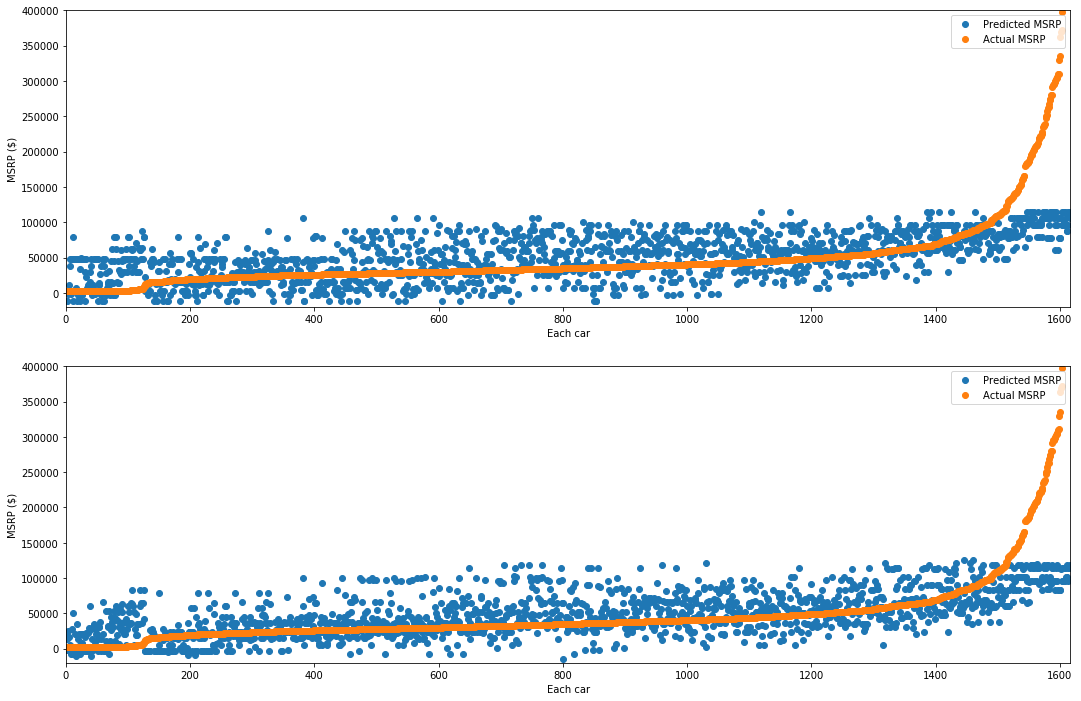

In [0]:
plt.figure(figsize=(18, 12))
plt.subplot(2, 1, 1)
plt.plot(range(test.shape[0]), test['Predicted'], 'o', range(test.shape[0]), test['Actual'], 'o')
plt.xlim(0, test.shape[0])
plt.ylim(-20000, 400000)
plt.legend(('Predicted MSRP', 'Actual MSRP'), loc='upper right')
plt.xlabel('Each car')
plt.ylabel('MSRP ($)')

test1 = testResults1.loc[(testResults1['Epochs'] == 10000) & (testResults1['Hidden Units'] == 10) & (testResults1['Batch Size'] == 25) 
                       & (testResults1['Learning Rate'] == 0.001)]
test1 = test1.sort_values('Actual')
print(carResults1)

plt.subplot(2, 1, 2)
plt.plot(range(test1.shape[0]), test1['Predicted'], 'o', range(test1.shape[0]), test1['Actual'], 'o')
plt.xlim(0, test1.shape[0])
plt.ylim(-20000, 400000)
plt.legend(('Predicted MSRP', 'Actual MSRP'), loc='upper right')
plt.xlabel('Each car')
plt.ylabel('MSRP ($)')

Our initial impression of the SGD graphs showed that it did not fill our data as well as running tanh or relu above. We noticed we were not running very high epochs, and with more time would have liked to try more parameters. After seeing SGD not perform well we ran with much more epochs than before and a much lower learning rate, as we learned that produced the best results in Assignment 2. Unfortunately this did not change the our prediction graph, but it did produce the best RMSE for SGD. Similar to Assignment 2, the largest epochs, and smallest learning rate was best, our parameters to produce the lowest RMSE were (Epochs = 10,000, Learning Rate = 0.001, Batch Size = 25, Hidden Units =  10 ).

With more time we could explore more parameters, and hopefully get some better predictions. As there are more parameters for SGD it took much much longer to run with different parameters, because there are several nested loops.

It was interesting to see with our dataset having the majority of MSRP values be so close, that trained models could achieve low RMSE values without following the "outliers" very well. We saw that for tanh and relu the number of epochs became the most important parameter, making our predicted MSRP values better fit the actual MSRP of each car. We came to the conclusion that SGD isn't as helpful as tanh and relu for producing the results we wanted. 